# Lambda = 4, EvolvedOperator: Results Processing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_last_val(df):
    #last_val_list = []
    val_list = []
    name_list = []
    for i in range(len(df.columns)):
        lv = df[df.columns[i]].dropna().to_numpy()[-1]
        val_list.append(np.round(lv,5))
        name_list.append(df.columns[i])
    return name_list, val_list

def plot_e(df, ax):
    for i in range(len(df.columns)):
        ax.plot(np.arange(len(df[df.columns[i]])),df[df.columns[i]],color = color_list[i], 
                 label=df.columns[i])

In [4]:

df_02_c = pd.read_csv('results/l4_l02_op_ev_20_30_40_indv_cobyla.csv')
df_02_s = pd.read_csv('results/l4_l02_op_ev_20_30_40_indv_spsa.csv')

df_05_c = pd.read_csv('results/l4_l05_op_ev_20_30_40_indv_cobyla.csv')
df_05_s = pd.read_csv('results/l4_l05_op_ev_20_30_40_indv_spsa.csv')

df_10_c = pd.read_csv('results/l4_l10_op_ev_20_30_40_indv_cobyla.csv')
df_10_s = pd.read_csv('results/l4_l10_op_ev_20_30_40_indv_spsa.csv')

df_20_c = pd.read_csv('results/l4_l20_op_ev_20_30_40_indv_cobyla.csv')
df_20_s = pd.read_csv('results/l4_l20_op_ev_20_30_40_indv_spsa.csv')

In [5]:

df_02_c.drop(['Unnamed: 0', 'ev_op_H40', 'ev_op_Hp40_2f'], axis = 1, inplace=True)
df_02_s.drop(['Unnamed: 0','ev_op_H40', 'ev_op_Hp40_2f'], axis = 1, inplace=True)

df_05_c.drop(['Unnamed: 0','ev_op_H40', 'ev_op_Hp40_2f'], axis = 1, inplace=True)
df_05_s.drop(['Unnamed: 0','ev_op_H40', 'ev_op_Hp40_2f'], axis = 1, inplace=True)

df_10_c.drop(['Unnamed: 0','ev_op_H40', 'ev_op_Hp40_2f'], axis = 1, inplace=True)
df_10_s.drop(['Unnamed: 0','ev_op_H40', 'ev_op_Hp40_2f'], axis = 1, inplace=True)

df_20_c.drop(['Unnamed: 0','ev_op_H40', 'ev_op_Hp40_2f'], axis = 1, inplace=True)
df_20_s.drop(['Unnamed: 0','ev_op_H40', 'ev_op_Hp40_2f'], axis = 1, inplace=True)

In [6]:
E_02 = 3.13406
E_05 = 3.29894
E_10 = 3.52625
E_20 = 3.89548

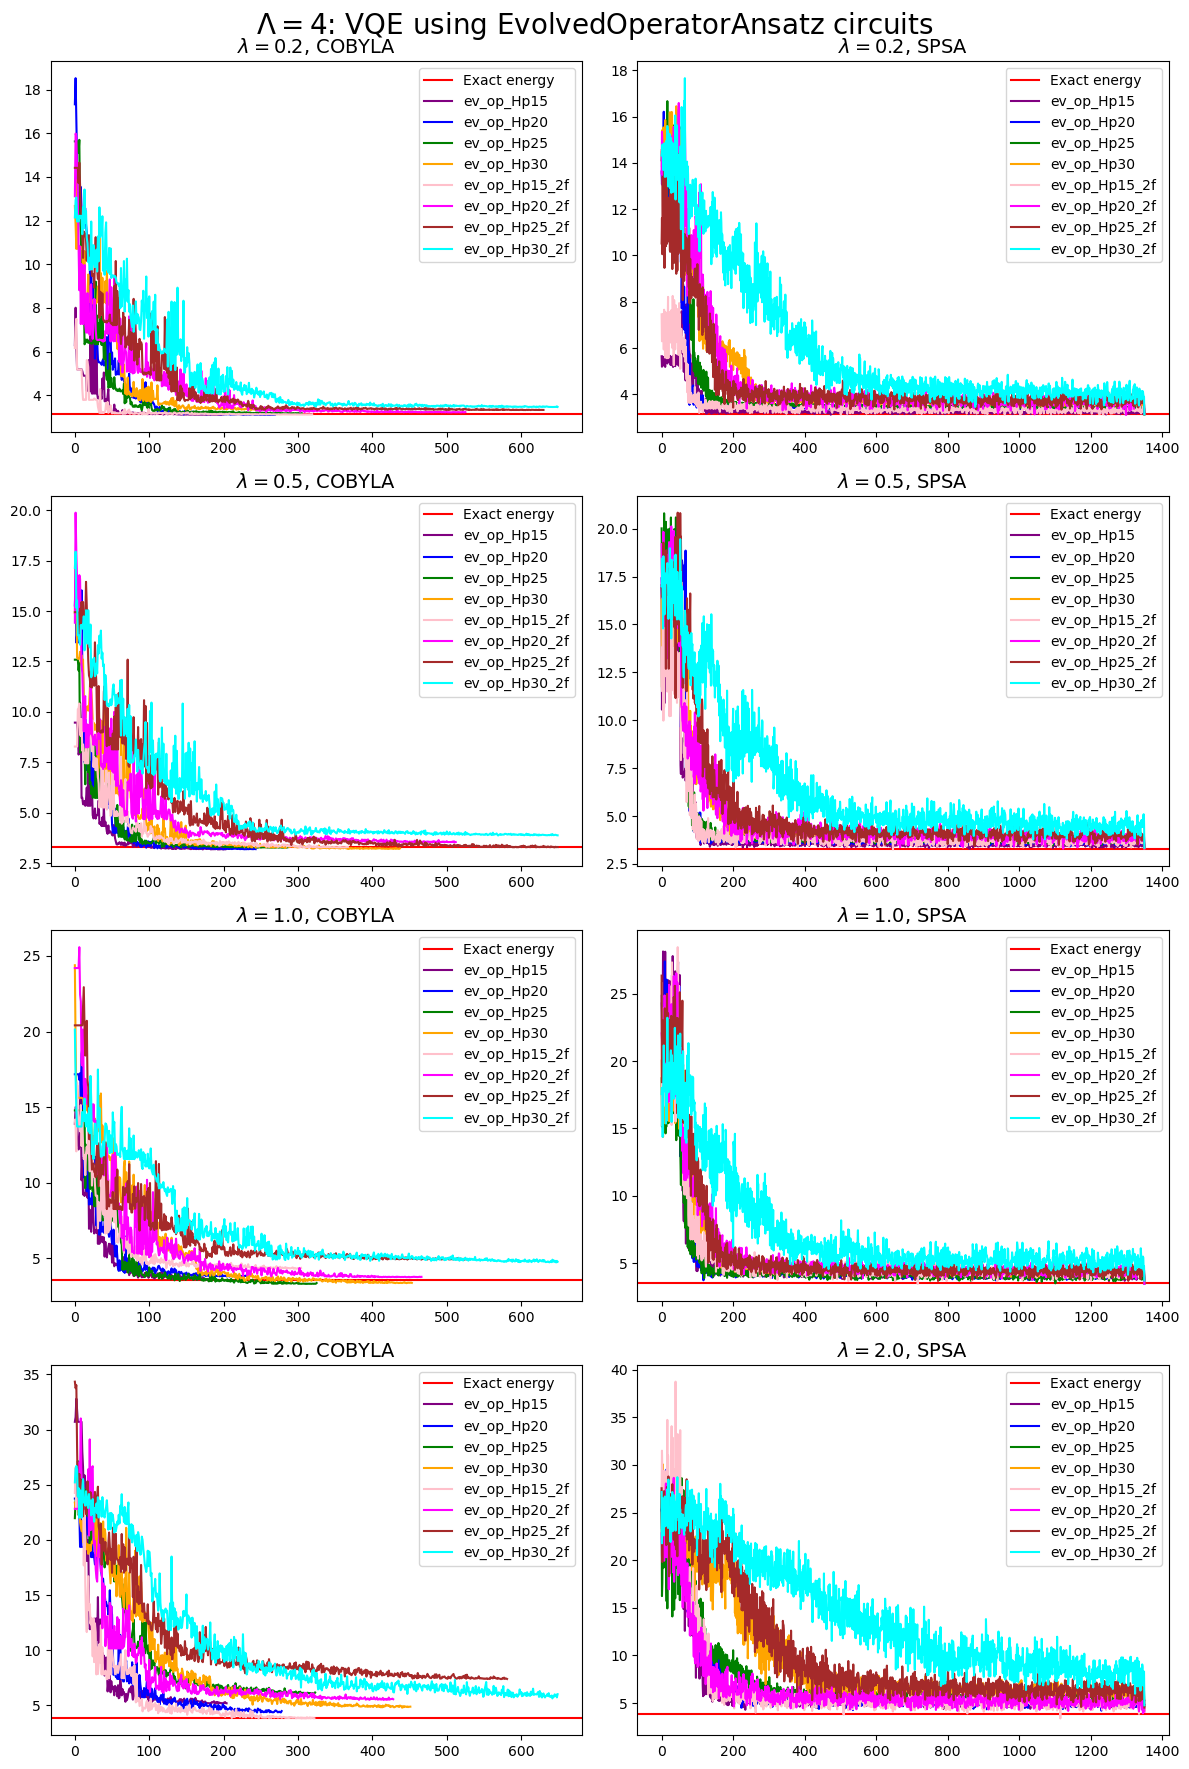

In [7]:
fig, ax = plt.subplots(4,2, figsize=(12,18), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'magenta', 'brown','cyan', 'yellow']
###################################
ax[0,0].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_c, ax[0,0])
ax[0,0].set_title('$\lambda=0.2$, COBYLA',fontsize = 14)
ax[0,0].legend()

ax[0,1].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_s, ax[0,1])
ax[0,1].set_title('$\lambda=0.2$, SPSA',fontsize = 14)
ax[0,1].legend()
###################################
ax[1,0].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_c, ax[1,0])
ax[1,0].set_title('$\lambda=0.5$, COBYLA',fontsize = 14)
ax[1,0].legend()

ax[1,1].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_s, ax[1,1])
ax[1,1].set_title('$\lambda=0.5$, SPSA',fontsize = 14)
ax[1,1].legend()
###################################
ax[2,0].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_c, ax[2,0])
ax[2,0].set_title('$\lambda=1.0$, COBYLA',fontsize = 14)
ax[2,0].legend()

ax[2,1].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_s, ax[2,1])
ax[2,1].set_title('$\lambda=1.0$, SPSA',fontsize = 14)
ax[2,1].legend()
###################################
ax[3,0].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_c, ax[3,0])
ax[3,0].set_title('$\lambda=2.0$, COBYLA',fontsize = 14)
ax[3,0].legend()

ax[3,1].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_s, ax[3,1])
ax[3,1].set_title('$\lambda=2.0$, SPSA',fontsize = 14)
ax[3,1].legend()

plt.suptitle('$\Lambda=4$: VQE using EvolvedOperatorAnsatz circuits', fontsize = 20)
plt.savefig('L=4_ev_op_convergence_curves.png')

# Collate last value

In [8]:
ns1, vs1 = get_last_val(df_02_s)
nc1, vc1 = get_last_val(df_02_c)
print(f'{ns1}\n {vs1}\n')
print(f'{nc1}\n {vc1}\n')
df_l02 = pd.DataFrame({'name': ns1, 'cobyla_values': vc1, 'spsa_values': vs1})
df_l02.set_index('name', inplace = True)

df_l02.to_csv('results/l0.2_last_val.csv')
df_l02

['ev_op_Hp15', 'ev_op_Hp20', 'ev_op_Hp25', 'ev_op_Hp30', 'ev_op_Hp15_2f', 'ev_op_Hp20_2f', 'ev_op_Hp25_2f', 'ev_op_Hp30_2f']
 [3.19377, 3.15612, 3.14337, 3.16268, 3.12846, 3.19462, 3.12774, 3.1316]

['ev_op_Hp15', 'ev_op_Hp20', 'ev_op_Hp25', 'ev_op_Hp30', 'ev_op_Hp15_2f', 'ev_op_Hp20_2f', 'ev_op_Hp25_2f', 'ev_op_Hp30_2f']
 [3.12106, 3.11756, 3.17782, 3.32965, 3.13053, 3.23598, 3.33135, 3.47127]



,cobyla_values,spsa_values
name,,
ev_op_Hp15,3.12106,3.19377
ev_op_Hp20,3.11756,3.15612
ev_op_Hp25,3.17782,3.14337
ev_op_Hp30,3.32965,3.16268
ev_op_Hp15_2f,3.13053,3.12846
ev_op_Hp20_2f,3.23598,3.19462
ev_op_Hp25_2f,3.33135,3.12774
ev_op_Hp30_2f,3.47127,3.13160


In [9]:
ns1, vs1 = get_last_val(df_05_s)
nc1, vc1 = get_last_val(df_05_c)
print(f'{ns1}\n {vs1}\n')
print(f'{nc1}\n {vc1}\n')
df_l05 = pd.DataFrame({'name': ns1, 'cobyla_values': vc1, 'spsa_values': vs1})
df_l05.set_index('name', inplace = True)

df_l02.to_csv('results/l0.5_last_val.csv')
df_l05

['ev_op_Hp15', 'ev_op_Hp20', 'ev_op_Hp25', 'ev_op_Hp30', 'ev_op_Hp15_2f', 'ev_op_Hp20_2f', 'ev_op_Hp25_2f', 'ev_op_Hp30_2f']
 [3.41548, 3.35646, 3.42603, 3.30582, 3.37805, 3.30794, 3.33608, 3.34507]

['ev_op_Hp15', 'ev_op_Hp20', 'ev_op_Hp25', 'ev_op_Hp30', 'ev_op_Hp15_2f', 'ev_op_Hp20_2f', 'ev_op_Hp25_2f', 'ev_op_Hp30_2f']
 [3.19333, 3.19783, 3.29968, 3.2342, 3.30153, 3.54492, 3.30028, 3.88094]



,cobyla_values,spsa_values
name,,
ev_op_Hp15,3.19333,3.41548
ev_op_Hp20,3.19783,3.35646
ev_op_Hp25,3.29968,3.42603
ev_op_Hp30,3.23420,3.30582
ev_op_Hp15_2f,3.30153,3.37805
ev_op_Hp20_2f,3.54492,3.30794
ev_op_Hp25_2f,3.30028,3.33608
ev_op_Hp30_2f,3.88094,3.34507


In [10]:
ns1, vs1 = get_last_val(df_10_s)
nc1, vc1 = get_last_val(df_10_c)
print(f'{ns1}\n {vs1}\n')
print(f'{nc1}\n {vc1}\n')
df_l10 = pd.DataFrame({'name': ns1, 'cobyla_values': vc1, 'spsa_values': vs1})
df_l10.set_index('name', inplace = True)

df_l10.to_csv('results/l1.0_last_val.csv')
df_l10

['ev_op_Hp15', 'ev_op_Hp20', 'ev_op_Hp25', 'ev_op_Hp30', 'ev_op_Hp15_2f', 'ev_op_Hp20_2f', 'ev_op_Hp25_2f', 'ev_op_Hp30_2f']
 [3.75863, 3.50884, 3.48718, 3.54551, 3.71765, 3.45539, 3.76259, 3.71206]

['ev_op_Hp15', 'ev_op_Hp20', 'ev_op_Hp25', 'ev_op_Hp30', 'ev_op_Hp15_2f', 'ev_op_Hp20_2f', 'ev_op_Hp25_2f', 'ev_op_Hp30_2f']
 [3.62082, 3.84073, 3.35342, 3.36268, 4.35314, 3.75998, 4.92616, 4.75916]



,cobyla_values,spsa_values
name,,
ev_op_Hp15,3.62082,3.75863
ev_op_Hp20,3.84073,3.50884
ev_op_Hp25,3.35342,3.48718
ev_op_Hp30,3.36268,3.54551
ev_op_Hp15_2f,4.35314,3.71765
ev_op_Hp20_2f,3.75998,3.45539
ev_op_Hp25_2f,4.92616,3.76259
ev_op_Hp30_2f,4.75916,3.71206


In [11]:
ns1, vs1 = get_last_val(df_20_s)
nc1, vc1 = get_last_val(df_20_c)
print(f'{ns1}\n {vs1}\n')
print(f'{nc1}\n {vc1}\n')
df_l20 = pd.DataFrame({'name': ns1, 'cobyla_values': vc1, 'spsa_values': vs1})
df_l20.set_index('name', inplace = True)

df_l20.to_csv('results/l2.0_last_val.csv')
df_l20

['ev_op_Hp15', 'ev_op_Hp20', 'ev_op_Hp25', 'ev_op_Hp30', 'ev_op_Hp15_2f', 'ev_op_Hp20_2f', 'ev_op_Hp25_2f', 'ev_op_Hp30_2f']
 [5.26024, 4.82453, 4.63808, 4.26867, 4.12574, 4.1024, 4.52611, 4.76864]

['ev_op_Hp15', 'ev_op_Hp20', 'ev_op_Hp25', 'ev_op_Hp30', 'ev_op_Hp15_2f', 'ev_op_Hp20_2f', 'ev_op_Hp25_2f', 'ev_op_Hp30_2f']
 [5.18872, 4.48164, 6.16766, 4.88188, 3.8333, 5.55726, 7.39414, 6.01181]



,cobyla_values,spsa_values
name,,
ev_op_Hp15,5.18872,5.26024
ev_op_Hp20,4.48164,4.82453
ev_op_Hp25,6.16766,4.63808
ev_op_Hp30,4.88188,4.26867
ev_op_Hp15_2f,3.83330,4.12574
ev_op_Hp20_2f,5.55726,4.10240
ev_op_Hp25_2f,7.39414,4.52611
ev_op_Hp30_2f,6.01181,4.76864


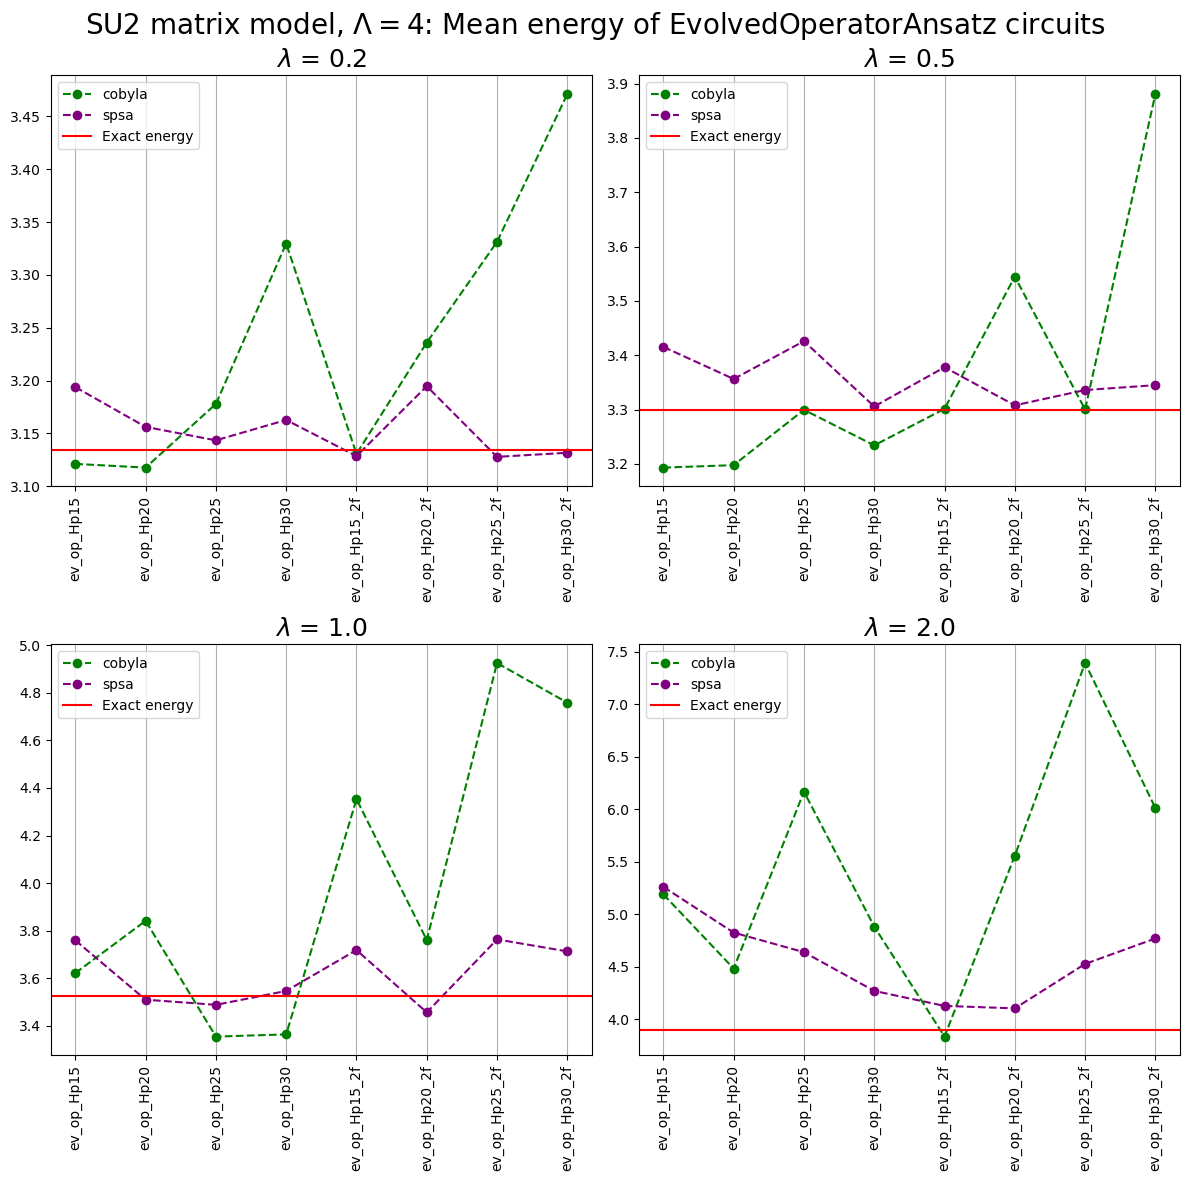

In [13]:
fig, ax = plt.subplots(2,2, figsize = (12,12), tight_layout= True)
ax[0,0].plot(df_l02['cobyla_values'], color='green', marker='o', linestyle='dashed', label='cobyla')
ax[0,0].plot(df_l02['spsa_values'], color='purple', marker='o', linestyle='dashed', label = 'spsa')
ax[0,0].axhline(E_02, color = 'red', label='Exact energy')
for tick in ax[0,0].get_xticklabels():
    tick.set_rotation(90)
ax[0,0].set_title('$\lambda$ = 0.2', fontsize = 18)
#ax[0,0].set_ylim([3.1, 3.3])
ax[0,0].legend()
ax[0,0].xaxis.grid(True)


ax[0,1].plot(df_l05['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[0,1].plot(df_l05['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[0,1].axhline(E_05, color = 'red', label='Exact energy')
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(90)
ax[0,1].set_title('$\lambda$ = 0.5', fontsize = 18)
#ax[0,1].set_ylim([3.1, 3.5])
ax[0,1].xaxis.grid(True)
ax[0,1].legend()

ax[1,0].plot(df_l10['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[1,0].plot(df_l10['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[1,0].axhline(E_10, color = 'red', label='Exact energy')
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(90)
ax[1,0].set_title('$\lambda$ = 1.0', fontsize = 18)
#ax[1,0].set_ylim([3.3, 3.9])
ax[1,0].xaxis.grid(True)
ax[1,0].legend()

ax[1,1].plot(df_l20['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[1,1].plot(df_l20['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[1,1].axhline(E_20, color = 'red', label='Exact energy')
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
ax[1,1].set_title('$\lambda$ = 2.0', fontsize = 18)
#ax[1,1].set_ylim([4.2, 4.8])
ax[1,1].xaxis.grid(True)
ax[1,1].legend(loc = 'upper left')

plt.suptitle('SU2 matrix model, $\Lambda=4$: Mean energy of EvolvedOperatorAnsatz circuits', fontsize = 20)
plt.savefig('L=4_ev_op_ansatze.png')